In [226]:
import pandas as pd
import sklearn as sklearn
import numpy as np
import matplotlib.pyplot as plt

In [227]:
data=pd.read_csv('Hospital100.csv',sep=';')

In [228]:
X=data.iloc[:,0:25]
y=data.iloc[:,25]

In [229]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [230]:
from sklearn.preprocessing import StandardScaler   
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [231]:
from sklearn.neural_network import MLPRegressor

In [232]:
nn=MLPRegressor()

In [233]:
from sklearn.model_selection import GridSearchCV

In [234]:
grid_param_nn = {  
    'hidden_layer_sizes': [50,100,200],
    'activation': ['relu','logistic'],
    'solver': ['adam','sgd']
}

In [235]:
gd_sr_nn = GridSearchCV(estimator=nn,  
                     param_grid=grid_param_nn,
                     cv=5,
                     n_jobs=-1)

In [236]:
gd_sr_nn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [50, 100, 200], 'activation': ['relu', 'logistic'], 'solver': ['adam', 'sgd']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [237]:
best_parameters = gd_sr_nn.best_params_  
print(best_parameters)

{'activation': 'logistic', 'hidden_layer_sizes': 50, 'solver': 'adam'}


In [238]:
best_result = gd_sr_nn.best_score_  
print(best_result) 

0.6266560363145489


In [239]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [240]:
X_train, y_train = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100,)

In [241]:
grid_param_rfr = {  
    'n_estimators': [50,100, 200],
    'random_state': [0,1,2],
    'max_depth': [2,3]
}

In [242]:
gd_sr_rfr = GridSearchCV(estimator=regr,  
                     param_grid=grid_param_rfr,
                     cv=5,
                     n_jobs=-1)

In [243]:
gd_sr_rfr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 200], 'random_state': [0, 1, 2], 'max_depth': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [244]:
best_parameters = gd_sr_rfr.best_params_  
print(best_parameters)

{'max_depth': 3, 'n_estimators': 50, 'random_state': 1}


In [245]:
best_result = gd_sr_rfr.best_score_  
print(best_result) 

0.8772616612953058


In [246]:
from sklearn.svm import SVR

In [317]:
svr = SVR(gamma='scale', C=1.0, epsilon=0.2)

In [248]:
grid_param_svr = {  
    'gamma':['scale','auto'],
    'epsilon': [0.1,0.2,0.3] ,  #con0.1 da linear y con 0.2 da sigmoid
    'kernel': ['rbf','linear','poly','sigmoid']
}

In [251]:
gd_sr_svr = GridSearchCV(estimator=svr,  
                     param_grid=grid_param_svr,
                     cv=5,
                     n_jobs=-1)

In [258]:
gd_sr_svr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'gamma': ['scale', 'auto'], 'epsilon': [0.1, 0.2, 0.3], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [279]:
best_parameters = gd_sr_svr.best_params_  
print(best_parameters)

{'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [280]:
best_result = gd_sr.best_score_  
print(best_result)

0.5516892067005662


In [284]:
svr1 = SVR(gamma='scale', epsilon=0.1, kernel='linear')

In [319]:
svr1.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [321]:
y_pred=svr1.predict(X_train)

In [323]:
y_pred

array([ 49.72804078,   4.8774445 ,  11.89112424,  19.70912583,
        23.5394639 , -29.88258165,  -3.19305393,  81.41054519,
       -85.67994973,  66.107442  , -69.8828458 , -25.39066077,
       -40.26907273, -50.68926634,  11.64015529, -26.04195977,
       -10.12479931, -16.75676726, -18.80318076, -37.54495135,
         6.89111275,  95.06801209,  14.04538765,  37.5539511 ,
        61.08681637,  -7.49483009,  42.25034207,  89.82088564,
        47.4941709 ,  14.09229272, -29.77237289, -19.30666866,
        27.60035653, -12.72042655,   4.6824022 , -15.49947425,
        80.86977238, -42.62796417, -43.40576784, -13.83097653,
        55.61428843,   3.68886313,  35.10648399,  -4.71553296,
       -39.94575777, -54.14199648, -41.87175923,  37.43447007,
       -40.61134264,  43.91062545, -15.67470521, -42.04599085,
         2.39766511,   0.13279129,  12.63814248, -31.3498896 ,
       -29.33539537, -20.37226445,   3.04760619, -40.00526685,
       -26.58275022, -63.41025287, -66.6030384 ,  -7.96

In [289]:
y_train

array([ 49.82290745,   4.87728597,  11.91487464,  19.75307803,
        23.60700003, -29.98278439,  -3.18275233,  81.61798896,
       -85.87627478,  66.296663  , -70.00907918, -25.41289672,
       -40.341885  , -50.80958638,  11.69850317, -26.06617118,
       -10.09289693, -16.81772822, -18.84474658, -37.62388016,
         6.90439112,  95.27998841,  14.08815923,  37.63961941,
        61.23802841,  -7.46245465,  42.37309217,  89.99454831,
        47.61800511,  14.11477091, -29.85246699, -19.3463247 ,
        27.69980617, -12.73102933,   4.69818239, -15.54546881,
        81.10896741, -42.73831876, -43.50103947, -13.81361736,
        55.72588193,   3.73964726,  35.17541383,  -4.68693299,
       -40.02555297, -54.23600024, -41.92953467,  37.56912025,
       -40.71853261,  43.95479823, -15.74495171, -42.13327197,
         2.38253778,   0.17626991,  12.60675473, -31.41170946,
       -29.41293009, -20.37016177,   3.09183413, -40.10546979,
       -26.63729755, -63.60114181, -66.77520312,  -8.00

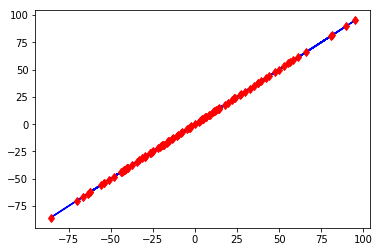

In [330]:
plt.plot(y_pred,y_pred,'b',y_pred,y_train,'rd')
plt.show()

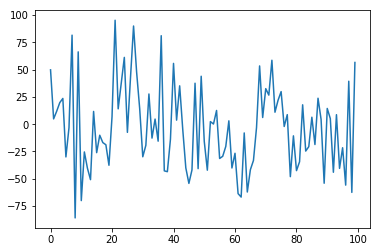

In [305]:
plt.plot(y_train)

In [268]:
#gd_sr_svr.cv_results_

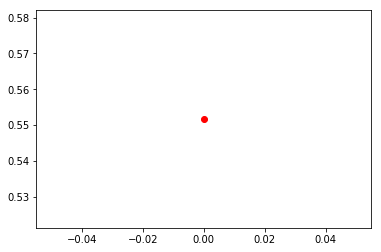

In [270]:
plt.plot(gd_sr.best_score_, 'ro')